In [1]:
from bs4 import BeautifulSoup
# Imports
import asyncio
import hashlib
import random
import time
from datetime import date
from urllib.request import Request, urlopen

import pandas as pd
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from requests import Session
from requests.utils import unquote
ua = UserAgent(fallback="chrome")
import re

## Testing "link_extractor"

In [1]:
import pandas as pd
from link_extractor import Google, Bing, Yahoo

### Testing Google class

In [2]:
google = Google(company="UBS")
google_links = google.get_links(max_articles=20)

HTTPError: HTTP Error 429: Too Many Requests

In [4]:
google_links.head()

,Search Engine,Link,Title,Source
0,Google,https://www.nytimes.com/2023/04/05/business/de...,UBS Chiefs See Risks Ahead in Credit Suisse Ta...,The New York Times
1,Google,https://finance.yahoo.com/news/ubs-executives-...,UBS Executives Say Surprise Credit Suisse Acqu...,Yahoo Finance
2,Google,https://www.cnbc.com/2023/04/05/ubs-holds-firs...,'Historic day': UBS sets out plans in first sh...,CNBC
3,Google,https://www.theguardian.com/business/2023/apr/...,UBS bosses urged to avoid job cuts and hikes i...,The Guardian
4,Google,https://www.cnbc.com/2023/04/04/credit-suisse-...,'I am truly sorry': Credit Suisse chair pleads...,CNBC


### Testing Bing class

In [5]:
bing = Bing(company="UBS")
bing_links = bing.get_links(max_articles=20)

In [6]:
bing_links.head()

,Search Engine,Link,Title,Source
0,Bing,https://www.msn.com/en-gb/money/companies/ubs-...,UBS CEO tells Credit Suisse staff to stay focu...,Reuters on MSN
1,Bing,https://www.cnbc.com/2023/04/06/ubs-names-glob...,UBS names 6 global 'high-quality' dividend sto...,CNBC
2,Bing,https://www.msn.com/en-us/money/markets/histor...,'Historic day': UBS sets out plans in first sh...,CNBC on MSN
3,Bing,https://www.msn.com/en-gb/money/other/ubs-tell...,UBS tells investors 'Herculean' Credit Suisse ...,Reuters on MSN
4,Bing,https://www.theguardian.com/business/2023/apr/...,UBS bosses urged to avoid job cuts and hikes i...,The Guardian


### Testing Yahoo class

In [7]:
yahoo = Yahoo(company="UBS")
yahoo_links = yahoo.get_links(max_articles=20)

In [8]:
yahoo_links.head()

,Search Engine,Link,Title,Source
0,Yahoo,https://www.ibtimes.com/ubs-joins-layoff-tide-...,"UBS Joins Layoff Tide, To Cut Staff By Up To 3...",International Business Times
1,Yahoo,https://www.investing.com/news/stock-market-ne...,UBS CEO tells Credit Suisse staff to stay focu...,Investing.com
2,Yahoo,https://finance.yahoo.com/news/ubs-shareholder...,UBS shareholders re-elect Kelleher as Chairman...,Reuters via Yahoo Finance
3,Yahoo,https://www.morningstar.com/news/business-wire...,UBS declares coupon payments on 12 ETRACS Exch...,Morningstar
4,Yahoo,https://finance.yahoo.com/news/ubs-credit-suis...,UBS and Credit Suisse shares drop as Swiss pro...,Reuters via Yahoo Finance


## Testing "html_content_extractor2"

### Combine links from Google, Bing, and Yahoo

In [9]:
links = pd.concat([google_links, bing_links, yahoo_links])

In [10]:
links["Search Engine"].value_counts()

Google    20
Bing      20
Yahoo     20
Name: Search Engine, dtype: int64

In [11]:
links["Link"].duplicated().sum()

8

In [12]:
urls = links["Link"].drop_duplicates().to_list()
len(urls)

52

In [13]:
from content_extractor2 import get_content

In [14]:
results = get_content(urls)

Getting news article info: 100%|██████████| 52/52 [01:56<00:00,  2.24s/it]


In [15]:
results.head(10)

,Link,Title,Body,Author,Published
0,https://finance.yahoo.com/news/ubs-executives-...,UBS Executives Say Surprise Credit Suisse Acqu...,When UBS AG (NYSE: UBS) agreed to acquire Cred...,[Vandana Singh],None
1,https://www.cnbc.com/2023/04/05/ubs-holds-firs...,'Historic day': UBS sets out plans in first sh...,"BASEL, Switzerland - April 5, 2023: UBS Chairm...",[Elliot Smith],2023-04-05 00:00:00
2,https://www.theguardian.com/business/2023/apr/...,UBS bosses urged to avoid job cuts and hikes i...,Worried UBS investors have urged the Swiss len...,[Kalyeena Makortoff],2023-04-05 00:00:00
3,https://www.cnbc.com/2023/04/04/credit-suisse-...,'I am truly sorry': Credit Suisse chair pleads...,In this article CSG.N-CH Follow your favorite ...,[Elliot Smith],2023-04-04 00:00:00
4,https://www.bloomberg.com/news/articles/2023-0...,UBS Chairman’s Top-Secret Prep Paid Off in Cre...,Storylines\n\nFollow Bloomberg reporters as th...,"[Jan-Henrik Foerster, Aaron Kirchfeld, Katheri...",2023-04-04 00:00:00
5,https://www.ft.com/content/e2c33477-96ee-4774-...,Subscribe to read,What is included in my trial?\n\nDuring your t...,[],None
6,https://www.reuters.com/business/finance/ubs-f...,UBS tells investors 'Herculean' Credit Suisse ...,"\n\n\n\n\n\n\n\n\n\n\n\n\n\nBASEL, April 5 (Re...",[Noele Illien],2023-04-05 00:00:00
7,https://www.bloomberg.com/news/articles/2023-0...,Shareholders Fret Over Megabank Risk Profile: ...,Storylines\n\nFollow Bloomberg reporters as th...,"[Myriam Balezou, Marion Halftermeyer, Myriam B...",2023-04-05 00:00:00
8,https://www.cnbc.com/2023/04/06/ubs-names-glob...,UBS names 6 global 'high-quality' dividend sto...,"UBS just named several ""high-quality"" dividend...",[Ganesh Rao],2023-04-06 00:00:00
9,https://www.reuters.com/business/finance/ubs-c...,UBS CEO tells Credit Suisse staff to stay focu...,"\n\n\n\n\n\n\n\n\n\n\n\n\n\nZURICH, April 6 (R...",[],2023-04-06 00:00:00


## Some NLP Preprocessing

In [16]:
len(results)

49

In [17]:
data = results.loc[results["Body"].str.strip().astype(bool)].reset_index(drop=True)

In [18]:
# Why would you ever make a string column boolean?
x = ""
bool(x)

False

In [19]:
len(data)

36

In [20]:
data.head()

,Link,Title,Body,Author,Published
0,https://finance.yahoo.com/news/ubs-executives-...,UBS Executives Say Surprise Credit Suisse Acqu...,When UBS AG (NYSE: UBS) agreed to acquire Cred...,[Vandana Singh],None
1,https://www.cnbc.com/2023/04/05/ubs-holds-firs...,'Historic day': UBS sets out plans in first sh...,"BASEL, Switzerland - April 5, 2023: UBS Chairm...",[Elliot Smith],2023-04-05 00:00:00
2,https://www.theguardian.com/business/2023/apr/...,UBS bosses urged to avoid job cuts and hikes i...,Worried UBS investors have urged the Swiss len...,[Kalyeena Makortoff],2023-04-05 00:00:00
3,https://www.cnbc.com/2023/04/04/credit-suisse-...,'I am truly sorry': Credit Suisse chair pleads...,In this article CSG.N-CH Follow your favorite ...,[Elliot Smith],2023-04-04 00:00:00
4,https://www.bloomberg.com/news/articles/2023-0...,UBS Chairman’s Top-Secret Prep Paid Off in Cre...,Storylines\n\nFollow Bloomberg reporters as th...,"[Jan-Henrik Foerster, Aaron Kirchfeld, Katheri...",2023-04-04 00:00:00


In [21]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

import string
import nltk
# Import the stop word list
from nltk.corpus import stopwords
nltk.download("stopwords")
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Import stemmer.
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Average Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).mean()

551.3888888888889

In [23]:
# Total Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).sum()

19850

### Remove Numbers (We are doing reputational NLP so doesnt seem relevant)

In [24]:
def remove_numbers(text):
    no_nums = "".join([i for i in text if not i.isdigit()])
    return no_nums

In [25]:
data["Body"] = data["Body"].apply(lambda x: remove_numbers(x))
data["Body"].head(10)

0    When UBS AG (NYSE: UBS) agreed to acquire Cred...
1    BASEL, Switzerland - April , : UBS Chairman Co...
2    Worried UBS investors have urged the Swiss len...
3    In this article CSG.N-CH Follow your favorite ...
4    Storylines\n\nFollow Bloomberg reporters as th...
5    What is included in my trial?\n\nDuring your t...
6    \n\n\n\n\n\n\n\n\n\n\n\n\n\nBASEL, April  (Reu...
7    Storylines\n\nFollow Bloomberg reporters as th...
8    UBS just named several "high-quality" dividend...
9    \n\n\n\n\n\n\n\n\n\n\n\n\n\nZURICH, April  (Re...
Name: Body, dtype: object

### Removing extra whitespaces / new lines

In [26]:
data["Body"] = data["Body"].replace(r'\n'," ", regex=True)

### Removing Punctuation

In [27]:
def remove_punctuation(text):
    no_punct = "".join ([c for c in text if c not in string.punctuation])
    return no_punct

In [28]:
data["Body"] = data["Body"].apply(lambda x: remove_punctuation(x))
data["Body"].head(10)

0    When UBS AG NYSE UBS agreed to acquire Credit ...
1    BASEL Switzerland  April   UBS Chairman Colm K...
2    Worried UBS investors have urged the Swiss len...
3    In this article CSGNCH Follow your favorite st...
4    Storylines  Follow Bloomberg reporters as they...
5    What is included in my trial  During your tria...
6                  BASEL April  Reuters  UBS UBSGS ...
7    Storylines  Follow Bloomberg reporters as they...
8    UBS just named several highquality dividendpay...
9                  ZURICH April  Reuters  UBS UBSGS...
Name: Body, dtype: object

### Tokenization

In [29]:
tokenizer = RegexpTokenizer(r'\w+')

In [30]:
data["Body"] = data["Body"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Body"].head(10)

0    [when, ubs, ag, nyse, ubs, agreed, to, acquire...
1    [basel, switzerland, april, ubs, chairman, col...
2    [worried, ubs, investors, have, urged, the, sw...
3    [in, this, article, csgnch, follow, your, favo...
4    [storylines, follow, bloomberg, reporters, as,...
5    [what, is, included, in, my, trial, during, yo...
6    [basel, april, reuters, ubs, ubsgs, executives...
7    [storylines, follow, bloomberg, reporters, as,...
8    [ubs, just, named, several, highquality, divid...
9    [zurich, april, reuters, ubs, ubsgs, chief, ex...
Name: Body, dtype: object

### Removing Stopwords

In [31]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words("english")]
    return words

In [32]:
data["Body"] = data["Body"].apply(lambda x: remove_stopwords(x))
data["Body"].head(10)

0    [ubs, ag, nyse, ubs, agreed, acquire, credit, ...
1    [basel, switzerland, april, ubs, chairman, col...
2    [worried, ubs, investors, urged, swiss, lender...
3    [article, csgnch, follow, favorite, stocks, cr...
4    [storylines, follow, bloomberg, reporters, unc...
5    [included, trial, trial, complete, digital, ac...
6    [basel, april, reuters, ubs, ubsgs, executives...
7    [storylines, follow, bloomberg, reporters, unc...
8    [ubs, named, several, highquality, dividendpay...
9    [zurich, april, reuters, ubs, ubsgs, chief, ex...
Name: Body, dtype: object

### Lemmatization

In [33]:
lemmatizer = WordNetLemmatizer()

In [34]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize (i) for i in text]
    return lem_text

In [35]:
data["Body"] = data["Body"].apply(lambda x: word_lemmatizer(x))
data["Body"].head(10)

0    [ubs, ag, nyse, ubs, agreed, acquire, credit, ...
1    [basel, switzerland, april, ubs, chairman, col...
2    [worried, ubs, investor, urged, swiss, lender,...
3    [article, csgnch, follow, favorite, stock, cre...
4    [storyline, follow, bloomberg, reporter, uncov...
5    [included, trial, trial, complete, digital, ac...
6    [basel, april, reuters, ubs, ubsgs, executive,...
7    [storyline, follow, bloomberg, reporter, uncov...
8    [ubs, named, several, highquality, dividendpay...
9    [zurich, april, reuters, ubs, ubsgs, chief, ex...
Name: Body, dtype: object

In [36]:
# Average Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).mean()

334.77777777777777

In [37]:
# Total Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).sum()

12052

### Encoding

In [38]:
text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

In [39]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 abcdefghijklmnopqrstuvwxyzäü
29


In [40]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate (chars) }
itos = { i:ch for i,ch in enumerate (chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''. join ( [itos [i] for i in l]) # decoder: take a list of integers, output a string
print (encode("hii there"))
print (decode(encode("hii there")))

[8, 9, 9, 0, 20, 8, 5, 18, 5]
hii there


### Wordcloud - Test

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

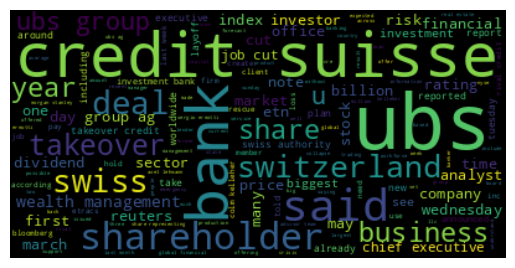

In [42]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud on Titles only

In [43]:
data["Title"] = data["Title"].apply(lambda x: remove_numbers(x))
data["Title"] = data["Title"].replace(r'\n'," ", regex=True)
data["Title"] = data["Title"].apply(lambda x: remove_punctuation(x))
data["Title"] = data["Title"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Title"] = data["Title"].apply(lambda x: remove_stopwords(x))
data["Title"] = data["Title"].apply(lambda x: word_lemmatizer(x))

In [44]:
title_text = data["Title"].apply(lambda x: " ".join(x)).str.cat()

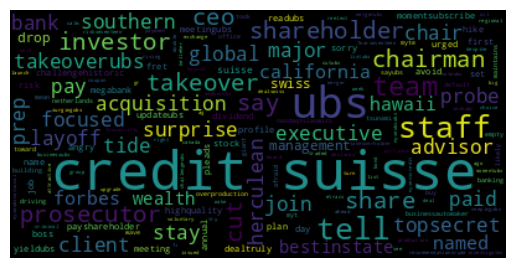

In [45]:
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(title_text)

# Display the generated image:
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Multithreading Test

In [ ]:
from link_extractor import SearchEngines # Might make sense to make Search Engines seperate file for clarity
from link_extractor import Google, Bing, Yahoo
import pandas as pd

In [ ]:
%%time
# Calling each browser seperately (single threaded)
google = Google(company="UBS")
google_ubs = google.get_links(max_articles=100)

bing = Bing(company="UBS")
bing_ubs = bing.get_links(max_articles=100)

yahoo = Yahoo(company="UBS")
yahoo_ubs = yahoo.get_links(max_articles=100)

ubs_links = pd.concat([google_ubs, bing_ubs, yahoo_ubs])
ubs_links["Search Engine"].value_counts()

In [ ]:
%%time
# 2 Threads for each Search Engine (basically) = 6 total threads
# Articles is for each search engine

engines = SearchEngines(company="UBS")
ubs = engines.get_links(max_articles=20, threads=6)
ubs["Search Engine"].value_counts()

In [ ]:
ubs.head()

## More organized Folder structure ? :)

```
search_engines/
│   __init__.py
│
└───engines/
│   │   __init__.py
│   │   google.py
│   │   bing.py
│   │   yahoo.py
│   │   ...
│   
└───utils/
    │   __init__.py
    │   helpers.py
    │   ...
```